<a href="https://colab.research.google.com/github/Dariaaq/-/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_0_7_0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ссылка на материалы:  [пдф тут](https://drive.google.com/file/d/16Cm2tgrpuDH8eIdxdSYyOsfDPqnJ3byd/view?usp=sharing)

ФИО:

## Задание 1. HTTP-запросы, ответы и погода

Описание:

Напишите HTTP-запрос для получения информации о погоде в введенном городе из API.

Можно использовать API: https://open-meteo.com/. Используйте метод GET.


Ввод
```
56.50, 60.35
```

Вывод
```
Сегодня (1.11) погода 20 ◦С, нет осадков, туман
```





In [ ]:
import requests
from datetime import datetime


def send_request(url):
    response = requests.get(url)

    status_code = response.status_code
    if status_code == 200:
        return response.json()
    return None


def clear_data(data):
    current_date = datetime.today().date()
    current_date = f'{current_date.day}.{current_date.month}'

    temperature = data['current']['temperature_2m']
    temperature_format = data['current_units']['temperature_2m']

    weather_code = data['current']['weather_code']

    if weather_code in [0, 1]:
        weather = 'нет осадков, ясно'
    elif weather_code == 45:
        weather = 'нет осадков, туман'
    elif weather_code in [61, 63, 65 ,71 ,73, 75]:
        weather = 'возможны осадки, нет тумана'
    else:
        weather = 'не знаю, не был сегодня на улице'

    message = f'Сегодня ({current_date}) погода {temperature} {temperature_format}, {weather}'

    return message


def main():
    coordinates = input('Введите ваши координаты: ').split(', ')
    url = f"https://api.open-meteo.com/v1/forecast?latitude={coordinates[0]}&longitude={coordinates[1]}&current=temperature_2m,weather_code&forecast_days=1"
    data = send_request(url)
    message = clear_data(data)
    print(message)


main()

Введите ваши координаты: 56, 60
Сегодня (5.11) погода -5.2 °C, не знаю, не был сегодня на улице


## Задание 2. HTTP-запросы, ответы и покемоны

**Описание:**


Создайте код программы, которая будет взаимодействовать с API, со следующим функионалом:

1. Используя метод GET, отправьте запрос на endpoint /pokemon, чтобы получить список первых 20 покемонов

2. Извлеките имена покемонов из ответа и выведите их списком

3. Введите с помощью input() название одного из покемонов


```
Имя покемона: clefairy
```



4. Отправьте GET-запрос, чтобы получить полную информацию о выбранном покемоне

5. Извлеките и выведите следующие данные о введенном покемоне:

     • Имя

     • Тип

     • Вес

     • Рост

     • Способности

Используйте PokéAPI (https://pokeapi.co/), который предоставляет информацию о покемонах, их характеристиках, типах и другую информацию.

In [ ]:
import requests


def send_request(url):
    response = requests.get(url)

    status_code = response.status_code
    if status_code == 200:
        return response.json()
    return None


def name_pocemon(send):
    url_pocemon = []
    name_poc = []
    for k,v in send.items():
      if k == 'results':
          for i in v:
              for m, n in i.items():
                if m == 'name':
                  name_poc.append(n)
                if m == 'url':
                  url_pocemon.append(n)
    return name_poc


def one_pocemon(name):
    url_new = f"https://pokeapi.co/api/v2/pokemon/{name}"
    info = send_request(url_new)

    return info


url = 'https://pokeapi.co/api/v2/pokemon'

print(name_pocemon(send_request(url)))
name = input('')
info_list = [name]
a = one_pocemon(name)

for k, v in a.items():
        if k == 'height':
            info_list.append(v)
        if k == 'weight':
            info_list.append(v)
        if k == 'abilities':
            info_list.append(v)
        if k == 'types':
            info_list.append(v)

print('name:', info_list[0])
print('abilities:', info_list[1])
print('height:', info_list[2])
print('type:', info_list[3])
print('weight:', info_list[4])

['bulbasaur', 'ivysaur', 'venusaur', 'charmander', 'charmeleon', 'charizard', 'squirtle', 'wartortle', 'blastoise', 'caterpie', 'metapod', 'butterfree', 'weedle', 'kakuna', 'beedrill', 'pidgey', 'pidgeotto', 'pidgeot', 'rattata', 'raticate']
ivysaur
name: ivysaur
abilities: [{'ability': {'name': 'overgrow', 'url': 'https://pokeapi.co/api/v2/ability/65/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'chlorophyll', 'url': 'https://pokeapi.co/api/v2/ability/34/'}, 'is_hidden': True, 'slot': 3}]
height: 10
type: [{'slot': 1, 'type': {'name': 'grass', 'url': 'https://pokeapi.co/api/v2/type/12/'}}, {'slot': 2, 'type': {'name': 'poison', 'url': 'https://pokeapi.co/api/v2/type/4/'}}]
weight: 130


## Задание 3. HTTP-запросы, ответы и посты

**Описание:**

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API, реализуя следующие функции:

1. Реализуйте функцию, которая выполняет GET-запрос к https://jsonplaceholder.typicode.com/posts и возвращает список постов в формате JSON

2. Реализуйте функцию, котороая получает вводимое ID поста, выполняет GET-запрос по ID и возвращает данные поста в формате JSON

3. Реализуйте функцию, которая выполняет обработку JSON из пункта 2 и выводит всю важную информацию в консоль

In [ ]:
import requests


def get_posts():
    url = "https://jsonplaceholder.typicode.com/posts"
    response = requests.get(url)

    if response.status_code == 200:
        return response.json()
    else:
        print("Ошибка:", response.status_code)
        return None


def get_post_by_id(post_id):
    url = f"https://jsonplaceholder.typicode.com/posts/{post_id}"
    response = requests.get(url)

    if response.status_code == 200:
        return response.json()
    else:
        print("Ошибка", response.status_code)
        return None


def display_post_info(post):
    if post:
        print("Post ID:", post.get("id"))
        print("User  ID:", post.get("userId"))
        print("Title:", post.get("title"))
        print("Body:", post.get("body"))
    else:
        print("No post data to display.")


print(get_posts())
id = input('')
print(get_post_by_id(id))
display_post_info(get_post_by_id(id))

[{'userId': 1, 'id': 1, 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit', 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}, {'userId': 1, 'id': 2, 'title': 'qui est esse', 'body': 'est rerum tempore vitae\nsequi sint nihil reprehenderit dolor beatae ea dolores neque\nfugiat blanditiis voluptate porro vel nihil molestiae ut reiciendis\nqui aperiam non debitis possimus qui neque nisi nulla'}, {'userId': 1, 'id': 3, 'title': 'ea molestias quasi exercitationem repellat qui ipsa sit aut', 'body': 'et iusto sed quo iure\nvoluptatem occaecati omnis eligendi aut ad\nvoluptatem doloribus vel accusantium quis pariatur\nmolestiae porro eius odio et labore et velit aut'}, {'userId': 1, 'id': 4, 'title': 'eum et est occaecati', 'body': 'ullam et saepe reiciendis voluptatem adipisci\nsit amet autem assumenda provident rerum culpa\nquis hic c

## Задание 4. HTTP-запросы, ответы и работа с постами

**Описание**

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API (из предыдущего задания), реализуя новые функции:

1. Реализуйте функцию, которая принимает заголовок, содержимое и ID пользователя (информация вводится с помощью input()), выполняет POST-запрос для создания нового поста и возвращает информацию о созданном посте в формате JSON


```
Заголовок: Новый пост
Содержимое поста: Тут должно находиться содержимое нового поста...
ID пользователя: 10
```



2. Реализуйте функцию, которая принимает ID поста, новый заголовок и новое содержимое, выполняет PUT-запрос и возвращает обновлённый пост в формате JSON

3. Реализуйте функцию, которая принимает ID поста, выполняет DELETE-запрос и возвращает статус-код ответа

In [ ]:
import requests


def get_posts():
    url = "https://jsonplaceholder.typicode.com/posts"
    response = requests.get(url)

    if response.status_code == 200:
        return response.json()
    else:
        print("Ошибка:", response.status_code)
        return None


def get_post_by_id(post_id):
    url = f"https://jsonplaceholder.typicode.com/posts/{post_id}"
    response = requests.get(url)

    if response.status_code == 200:
        return response.json()
    else:
        print("Ошибка: ", response.status_code)
        return None


def display_post_info(post):
    if post:
        print("Post ID:", post.get("id"))
        print("User  ID:", post.get("userId"))
        print("Title:", post.get("title"))
        print("Body:", post.get("body"))
    else:
        print("No post data to display.")


def create_post(title, body, user_id):
    url = "https://jsonplaceholder.typicode.com/posts"
    post_data = {
        "title": title,
        "body": body,
        "userId": user_id
    }
    response = requests.post(url, json=post_data)

    if response.status_code == 201:
        return response.json()
    else:
        print("Error creating post:", response.status_code)
        return None


def update_post(post_id, title, body):
    url = f"https://jsonplaceholder.typicode.com/posts/{post_id}"
    updated_data = {
        "title": title,
        "body": body
    }
    response = requests.put(url, json=updated_data)

    if response.status_code == 200:
        return response.json()
    else:
        print("Error updating post:", response.status_code)
        return None


def delete_post(post_id):
    url = f"https://jsonplaceholder.typicode.com/posts/{post_id}"
    response = requests.delete(url)

    return response.status_code



def main():
    posts = get_posts()

    if posts:
        first_post = get_post_by_id(posts[0]['id'])
        display_post_info(first_post)

    title = input("Заголовок поста: ")
    body = input("Содержимое поста: ")
    user_id = int(input("ID пользователя: "))
    new_post = create_post(title, body, user_id)
    if new_post:
        print("Созданный пост:", new_post)

    post_id_to_update = int(input("Введите ID поста для обновления: "))
    new_title = input("Новый заголовок: ")
    new_body = input("Новое содержимое: ")
    updated_post = update_post(post_id_to_update, new_title, new_body)
    if updated_post:
        print("Обновленный пост:", updated_post)

    post_id_to_delete = int(input("Введите ID поста для удаления: "))
    status_code = delete_post(post_id_to_delete)
    if status_code == 200:
        print("Пост успешно удален.")
    else:
        print("Ошибка при удалении поста:", status_code)

main()

Post ID: 1
User  ID: 1
Title: sunt aut facere repellat provident occaecati excepturi optio reprehenderit
Body: quia et suscipit
suscipit recusandae consequuntur expedita et cum
reprehenderit molestiae ut ut quas totam
nostrum rerum est autem sunt rem eveniet architecto
Заголовок поста: ВАДИМ ТОП ПРЕПОД
Содержимое поста: Вадим Стрельцов, 23 года, преподаватель по программированию у первого курса АИИ и ПИИ
ID пользователя: 7
Созданный пост: {'title': 'ВАДИМ ТОП ПРЕПОД', 'body': 'Вадим Стрельцов, 23 года, преподаватель по программированию у первого курса АИИ и ПИИ', 'userId': 7, 'id': 101}
Введите ID поста для обновления: 7
Новый заголовок: Вадим Стрельцов и его путь к преподаванию
Новое содержимое: Вадим Вадимович Стрельцов, говорил себе, что никогда не будет работать в сфере преподавания, но вдруг что-то пошло не так..
Обновленный пост: {'title': 'Вадим Стрельцов и его путь к преподаванию', 'body': 'Вадим Вадимович Стрельцов, говорил себе, что никогда не будет работать в сфере преподава

## Задание 5. HTTP-запросы, ответы и пёсики

**Описание**

Создайте программу, которая будет взаимодействовать с Dog API, которая позволит получать список пород собак, вводить несколько пород и получать их фотогрфии.

Этапы:

1. Создайте функцию, которая использует метод GET и возвращает список всех пород собак в формате нумерованного списка

2. Реализуйте возможность ввода нескольких пород собак через запятую


```
african, chow, dingo
```



3. Создание функции, которая реализует запрос, возвращает и выводит изображениия собак, породы которых были введены до этого


Используйте Dog API (https://dog.ceo/dog-api/), который предоставляет информацию о породах собак и их изображения.


*Подсказка*



```
import requests
from PIL import Image
from IPython.display import display
import io

url = <____>
response = <____>
        
if response.<______> == <___>:
      image_url = response.json()['message']

res = requests.<__>(image_url)
img = Image.open(io.BytesIO(res.content))
display(img)
```



['1.affenpinscher', '2.african', '3.airedale', '4.akita', '5.appenzeller', '6.australian', '7.bakharwal', '8.basenji', '9.beagle', '10.bluetick', '11.borzoi', '12.bouvier', '13.boxer', '14.brabancon', '15.briard', '16.buhund', '17.bulldog', '18.bullterrier', '19.cattledog', '20.cavapoo', '21.chihuahua', '22.chippiparai', '23.chow', '24.clumber', '25.cockapoo', '26.collie', '27.coonhound', '28.corgi', '29.cotondetulear', '30.dachshund', '31.dalmatian', '32.dane', '33.danish', '34.deerhound', '35.dhole', '36.dingo', '37.doberman', '38.elkhound', '39.entlebucher', '40.eskimo', '41.finnish', '42.frise', '43.gaddi', '44.germanshepherd', '45.greyhound', '46.groenendael', '47.havanese', '48.hound', '49.husky', '50.keeshond', '51.kelpie', '52.kombai', '53.komondor', '54.kuvasz', '55.labradoodle', '56.labrador', '57.leonberg', '58.lhasa', '59.malamute', '60.malinois', '61.maltese', '62.mastiff', '63.mexicanhairless', '64.mix', '65.mountain', '66.mudhol', '67.newfoundland', '68.otterhound', '69.

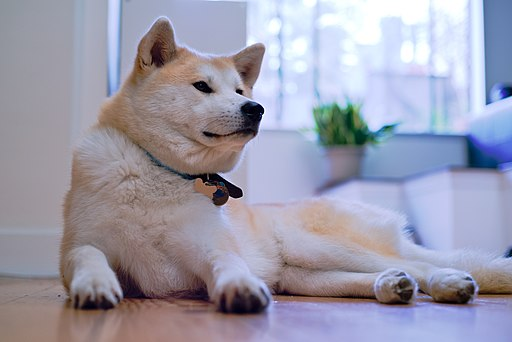

None


In [ ]:
import requests
from PIL import Image
from IPython.display import display
import io

def full_list():
    url = "https://dog.ceo/api/breeds/list/all"
    response = requests.get(url)
    a = 1
    list_dog = []

    if response.status_code == 200:
        for k, v in response.json().items():
            if k == 'message':

                for i, n in v.items():
                    list_dog.append(f'{a}.{i}')

                    a = a + 1

    return list_dog


def one_dog():
    input_dog = input('').split(', ')

    for i in input_dog:
      url = f"https://dog.ceo/api/breed/{i}/images/random"
      response = requests.get(url)

      if response.status_code == 200:
          print(response.json())
          image_url = response.json()['message']

          res = requests.get(image_url)
          img = Image.open(io.BytesIO(res.content))
          display(img)


print(full_list())
print(one_dog())